# Data Inspection

===================== Dataset shape =====================
(2938, 22)

===================== Dataset index =====================
RangeIndex(start=0, stop=2938, step=1)

===================== Dataset Columns =====================
Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

===================== Dataset info =====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year         

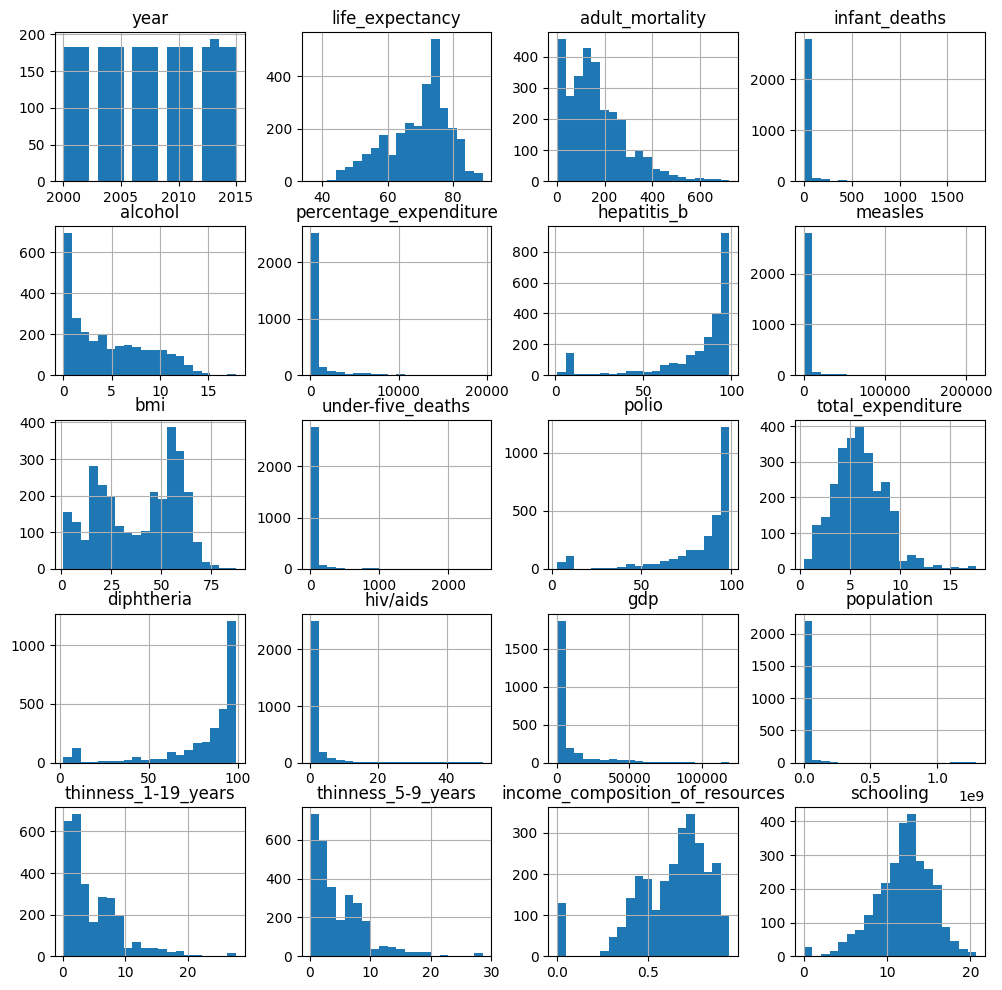

       life_expectancy  adult_mortality  infant_deaths      alcohol  \
count      2928.000000      2928.000000    2938.000000  2744.000000   
mean         69.224932       164.796448      30.303948     4.602861   
std           9.523867       124.292079     117.926501     4.052413   
min          36.300000         1.000000       0.000000     0.010000   
25%          63.100000        74.000000       0.000000     0.877500   
50%          72.100000       144.000000       3.000000     3.755000   
75%          75.700000       228.000000      22.000000     7.702500   
max          89.000000       723.000000    1800.000000    17.870000   

       percentage_expenditure  hepatitis_b        measles          bmi  \
count             2938.000000  2385.000000    2938.000000  2904.000000   
mean               738.251295    80.940461    2419.592240    38.321247   
std               1987.914858    25.070016   11467.272489    20.044034   
min                  0.000000     1.000000       0.000000     1.

<Figure size 640x480 with 0 Axes>

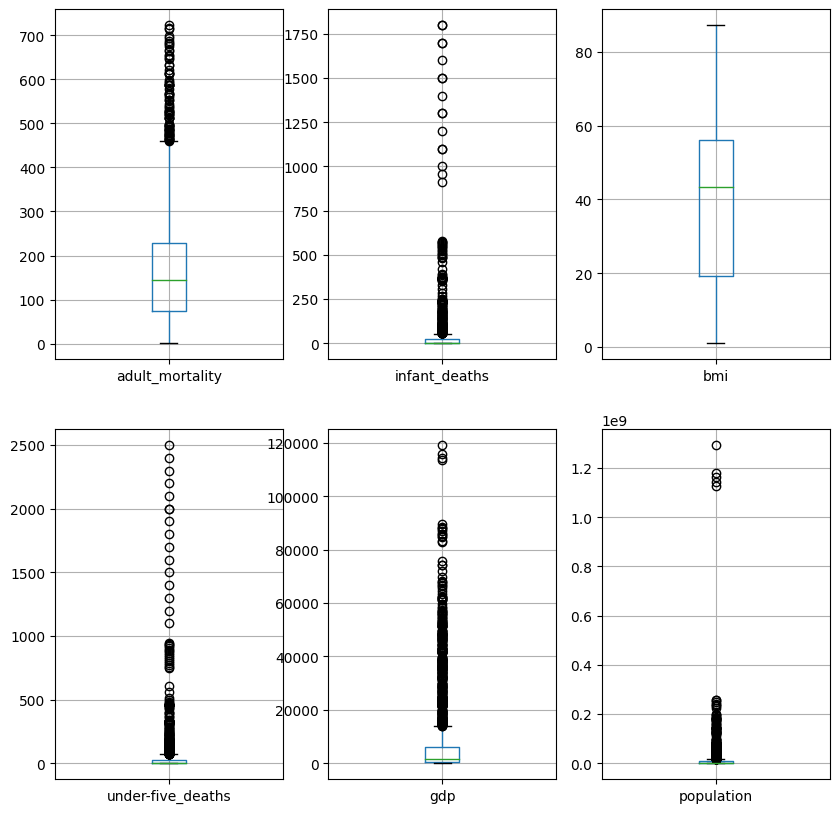

In [56]:
# Importing all the required Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import warnings
warnings.filterwarnings('ignore')

# Reading the datasets
df=pd.read_csv('Life_Expectancy_Data.csv')

# Rename columns by removing spaces, replacing spaces with underscores, and converting to lowercase
def cleaning_variable_descriptions(df):
    df.columns = [col.strip().replace('  ', ' ').replace(' ', '_').lower() for col in df.columns]

# Function to display dataset information
def display_dataset_info(df):
    # Size of the data 
    print("===================== Dataset shape =====================")
    print(df.shape)

    # Index of the data 
    print("\n===================== Dataset index =====================")
    print(df.index)

    # Columns of the data 
    print("\n===================== Dataset Columns =====================")
    print(df.columns)

    # A Quick Information about the Data
    print("\n===================== Dataset info =====================")
    print(df.info())

    # Print histogram for each column. 
    df.hist(bins=20, figsize=(12,12))
    plt.show()
    plt.subplots_adjust(hspace=1)

# Rename feature name
cleaning_variable_descriptions(df)

# Show info
display_dataset_info(df)

print(df.describe().iloc[:, 1:])

plt.figure(figsize=(10,10))
for i, col in enumerate(['adult_mortality', 'infant_deaths', 'bmi', 'under-five_deaths', 'gdp', 'population'], start=1):
    plt.subplot(2, 3, i)
    df.boxplot(col)


# Data Preprocessing


**Adult Mortality**: The reported value of 1 for adult mortality seems unlikely and may be a result of measurement error. If the value falls under a certain reasonable threshold, it might be more accurate to record it as null.

**Infant Deaths**: Zero infant deaths per 1000 isn't plausible. Values at such low levels are more likely to be null. On the other hand, the high value of 1800 might be an outlier. However, in a country with a high birth rate and possibly a small total population, such a number could still be possible.

**Body Mass Index (BMI)**: The range of recorded BMI values, from 1 to 87.3, appears unrealistic. A BMI below 15 indicates severe underweight, while one above 40 indicates morbid obesity. Therefore, a significant number of these BMI measurements seem improbable. It might not be worthwhile to analyze this variable in depth.

**Under-Five Deaths** : Similar to infant deaths, it is unlikely, if not impossible, for the number of under-five deaths to be zero in a population.

**GDP per Capita**: A GDP per capita as low as 1.68 USD seems doubtful. It could be that such low values are outliers and not representative of the general trend.

**Population**: A population of 34 for an entire country appears questionable. More investigation is needed to verify this figure.

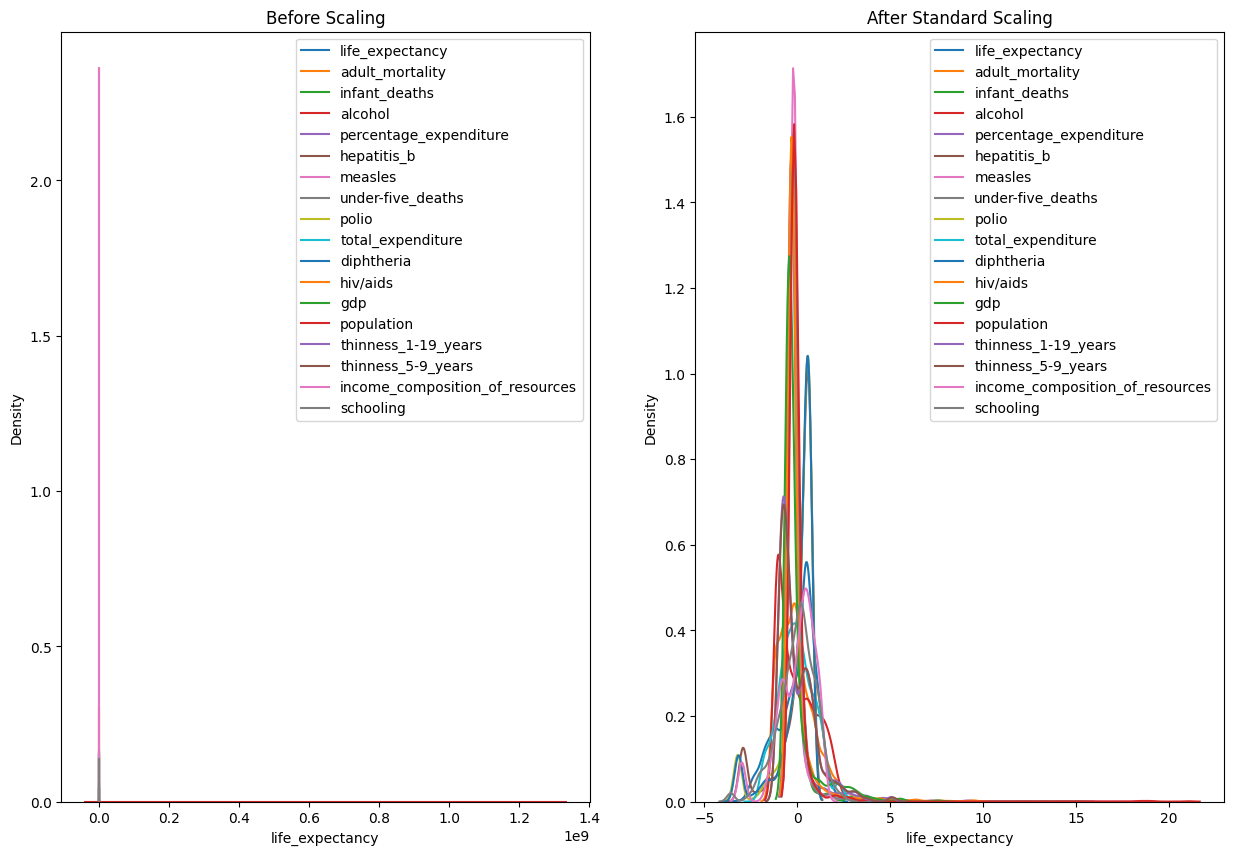

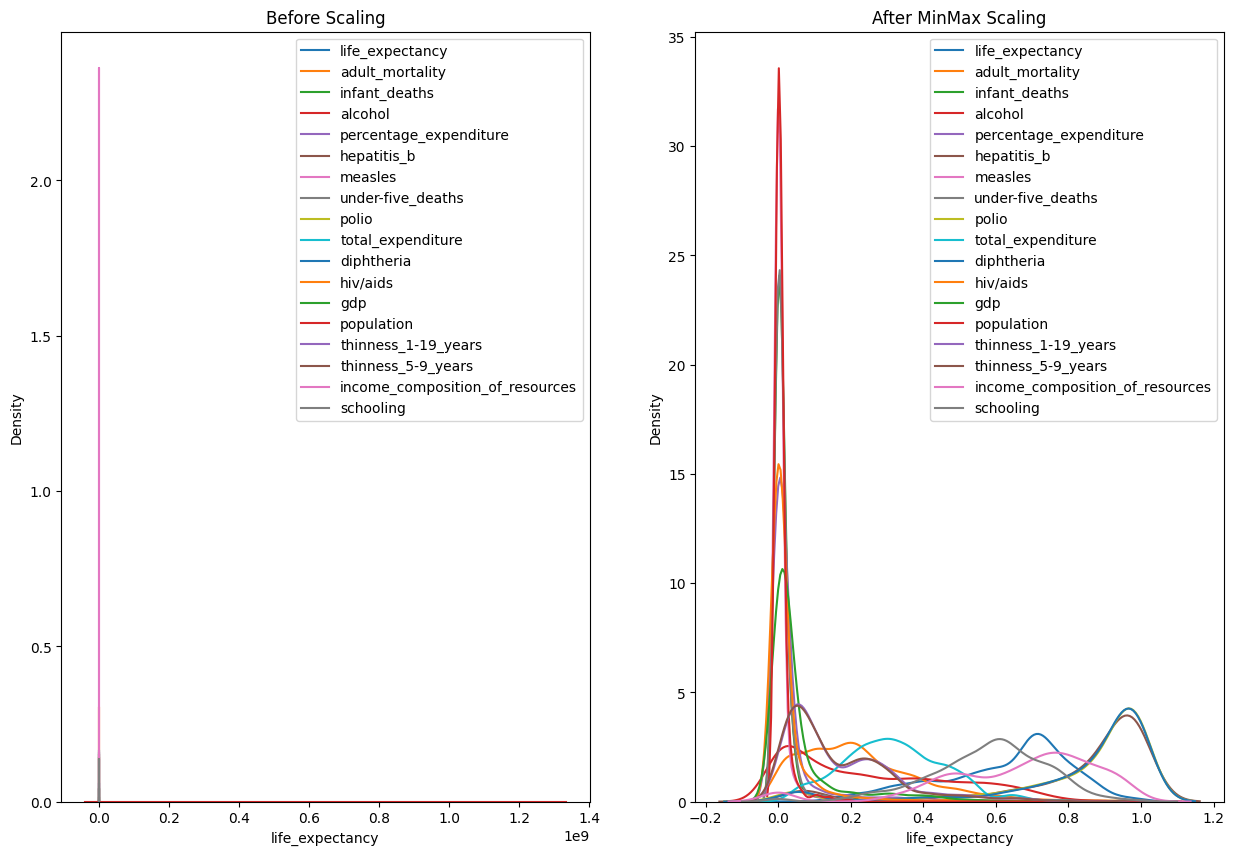

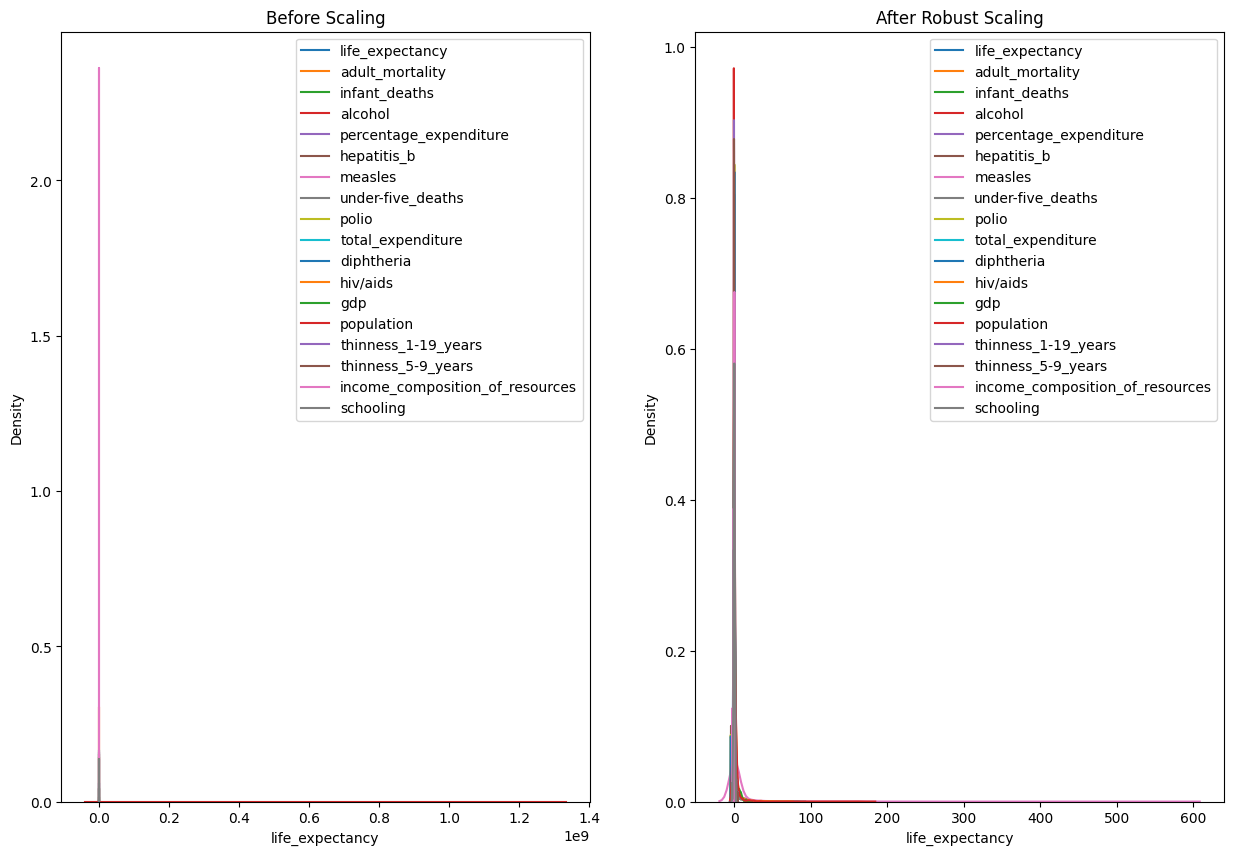

      country  year      status  life_expectancy  adult_mortality  \
0           0  2015  Developing        -0.446803         0.863287   
1           0  2014  Developing        -0.984892         0.934943   
2           0  2013  Developing        -0.984892         0.908072   
3           0  2012  Developing        -1.027095         0.943900   
4           0  2011  Developing        -1.058747         0.970771   
...       ...   ...         ...              ...              ...   
2933      192  2004  Developing        -2.599157         2.529292   
2934      192  2003  Developing        -2.599157         2.529292   
2935      192  2002  Developing        -2.578055        -0.838545   
2936      192  2001  Developing        -2.525301         2.529292   
2937      192  2000  Developing        -2.451446         2.529292   

      infant_deaths   alcohol  percentage_expenditure  hepatitis_b   measles  \
0          1.253036 -1.173361               -0.546410    -1.534064  1.886225   
1          

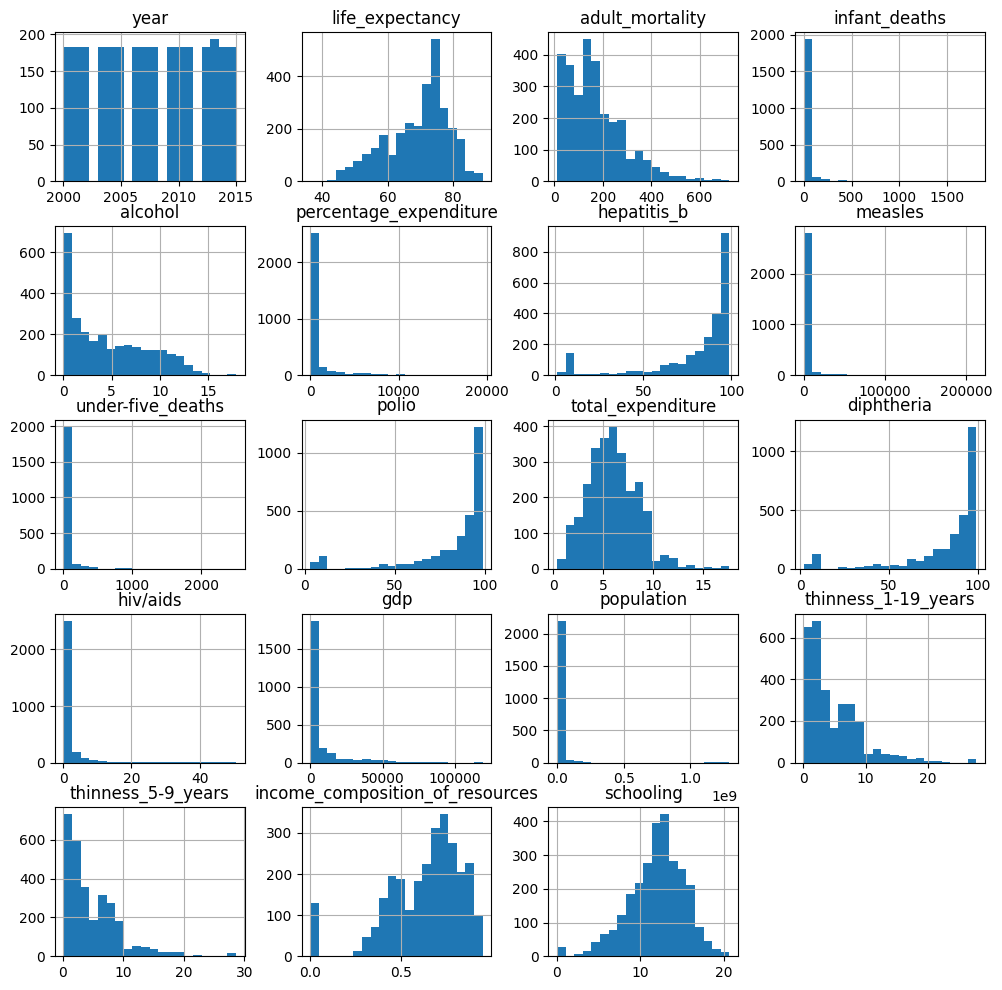

===================== Null Value Count Before Handling =====================
country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     96
infant_deaths                      848
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
under-five_deaths                  785
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

===================== Null Value Count After Handling =====================
country       

<Figure size 640x480 with 0 Axes>

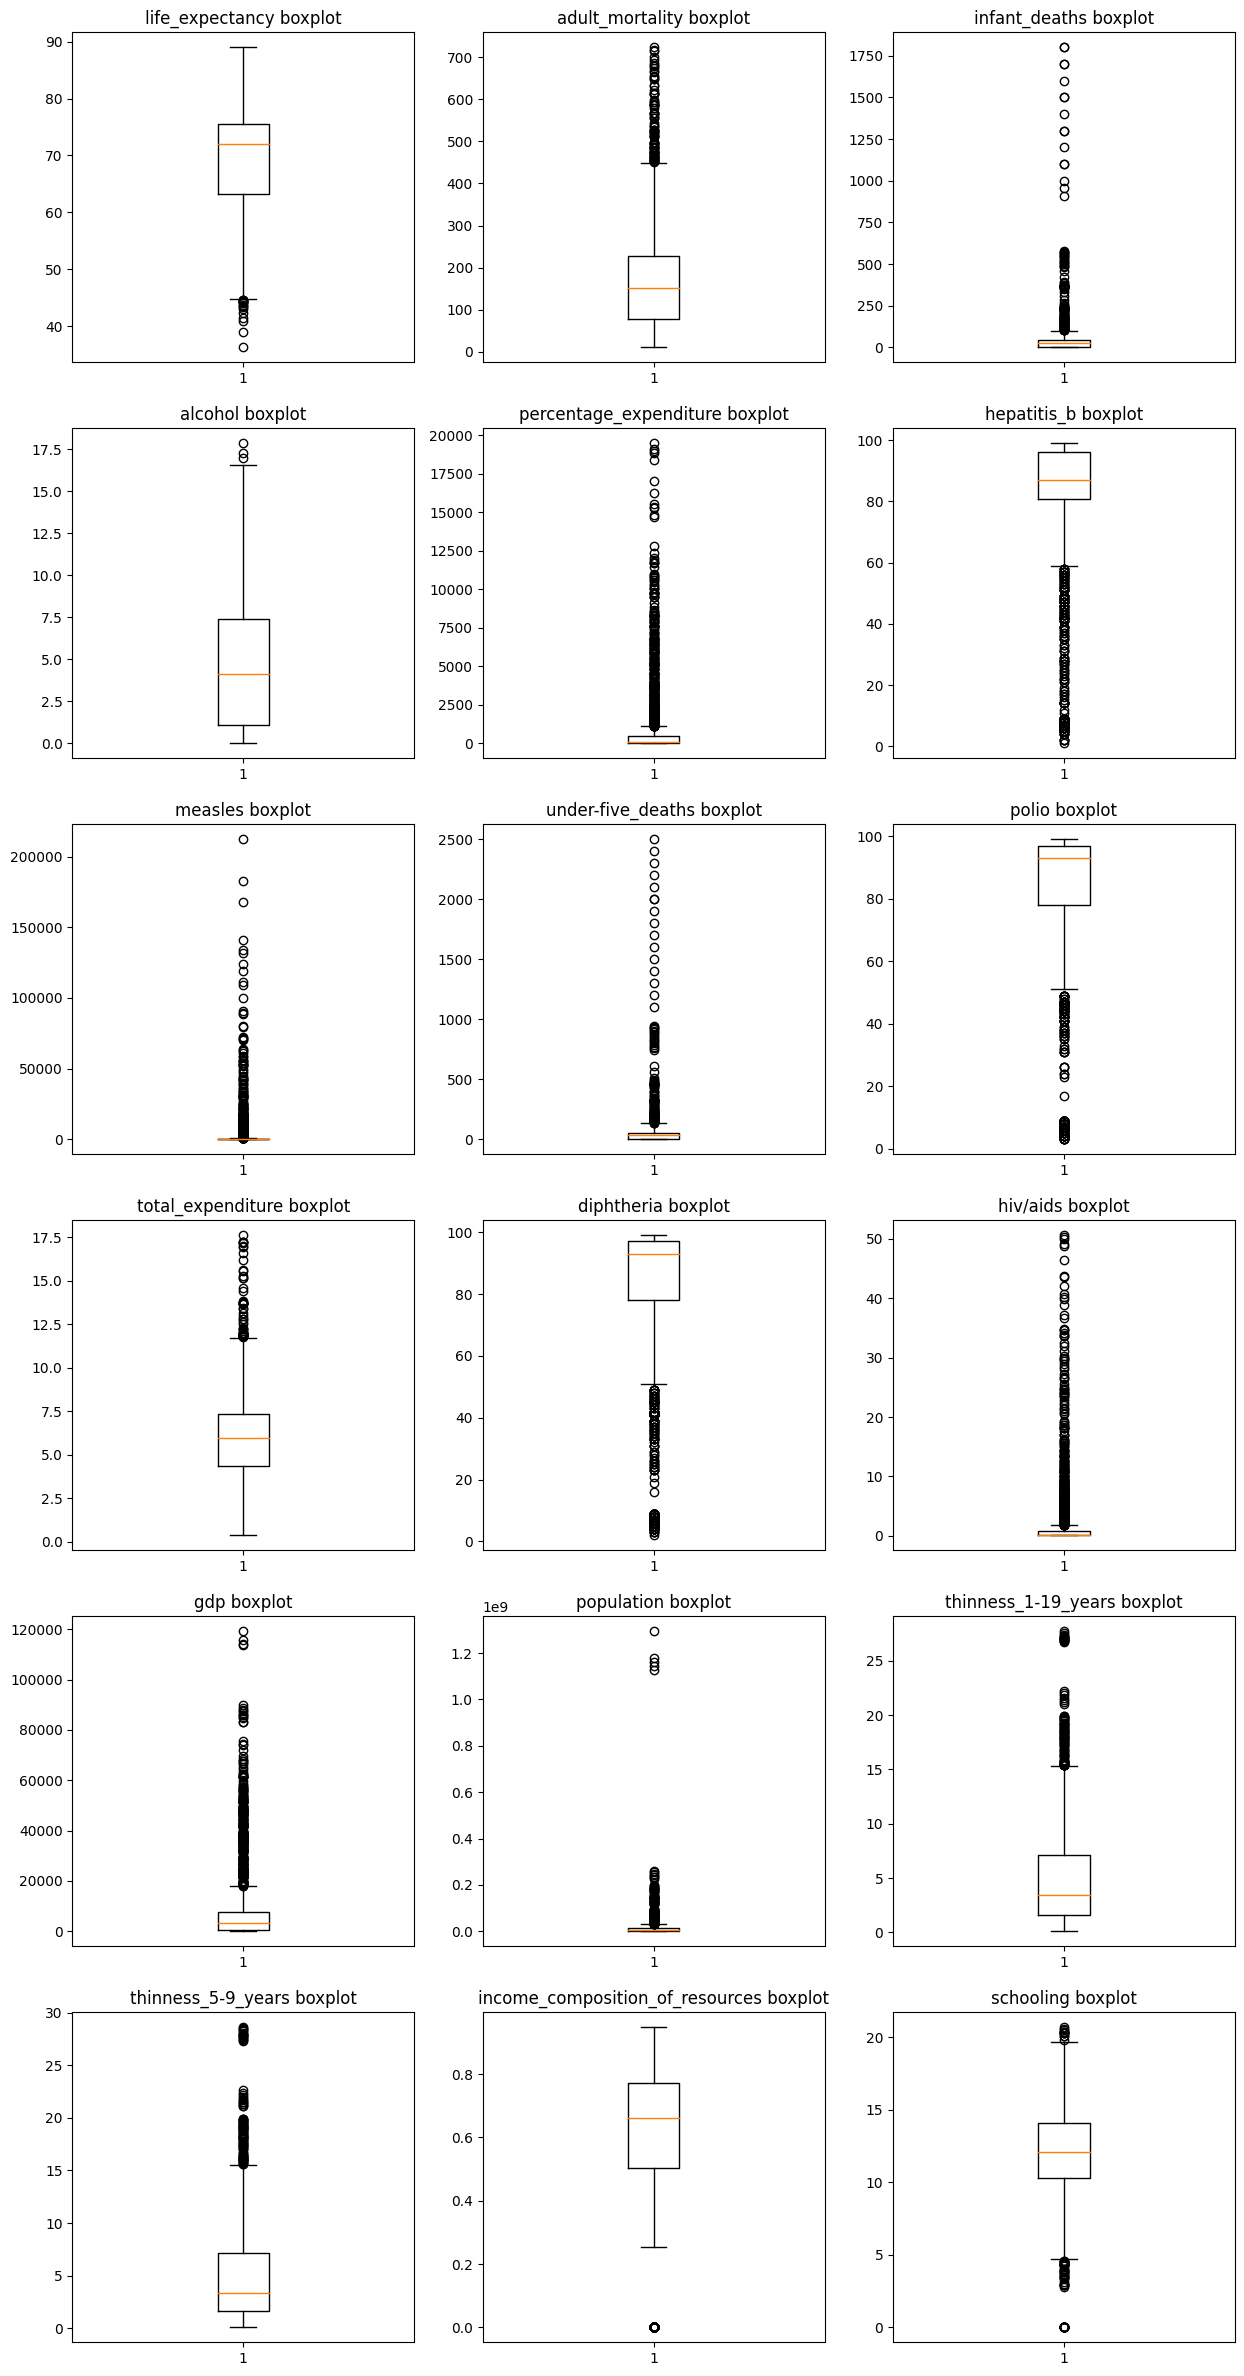

Before handling outlier data

---------------life_expectancy---------------
Number of outliers: 17
Percent of data that is outlier: 0.58%
---------------adult_mortality---------------
Number of outliers: 91
Percent of data that is outlier: 3.1%
---------------infant_deaths---------------
Number of outliers: 137
Percent of data that is outlier: 4.66%
---------------alcohol---------------
Number of outliers: 3
Percent of data that is outlier: 0.1%
---------------percentage_expenditure---------------
Number of outliers: 389
Percent of data that is outlier: 13.24%
---------------hepatitis_b---------------
Number of outliers: 316
Percent of data that is outlier: 10.76%
---------------measles---------------
Number of outliers: 542
Percent of data that is outlier: 18.45%
---------------under-five_deaths---------------
Number of outliers: 148
Percent of data that is outlier: 5.04%
---------------polio---------------
Number of outliers: 279
Percent of data that is outlier: 9.5%
---------------t

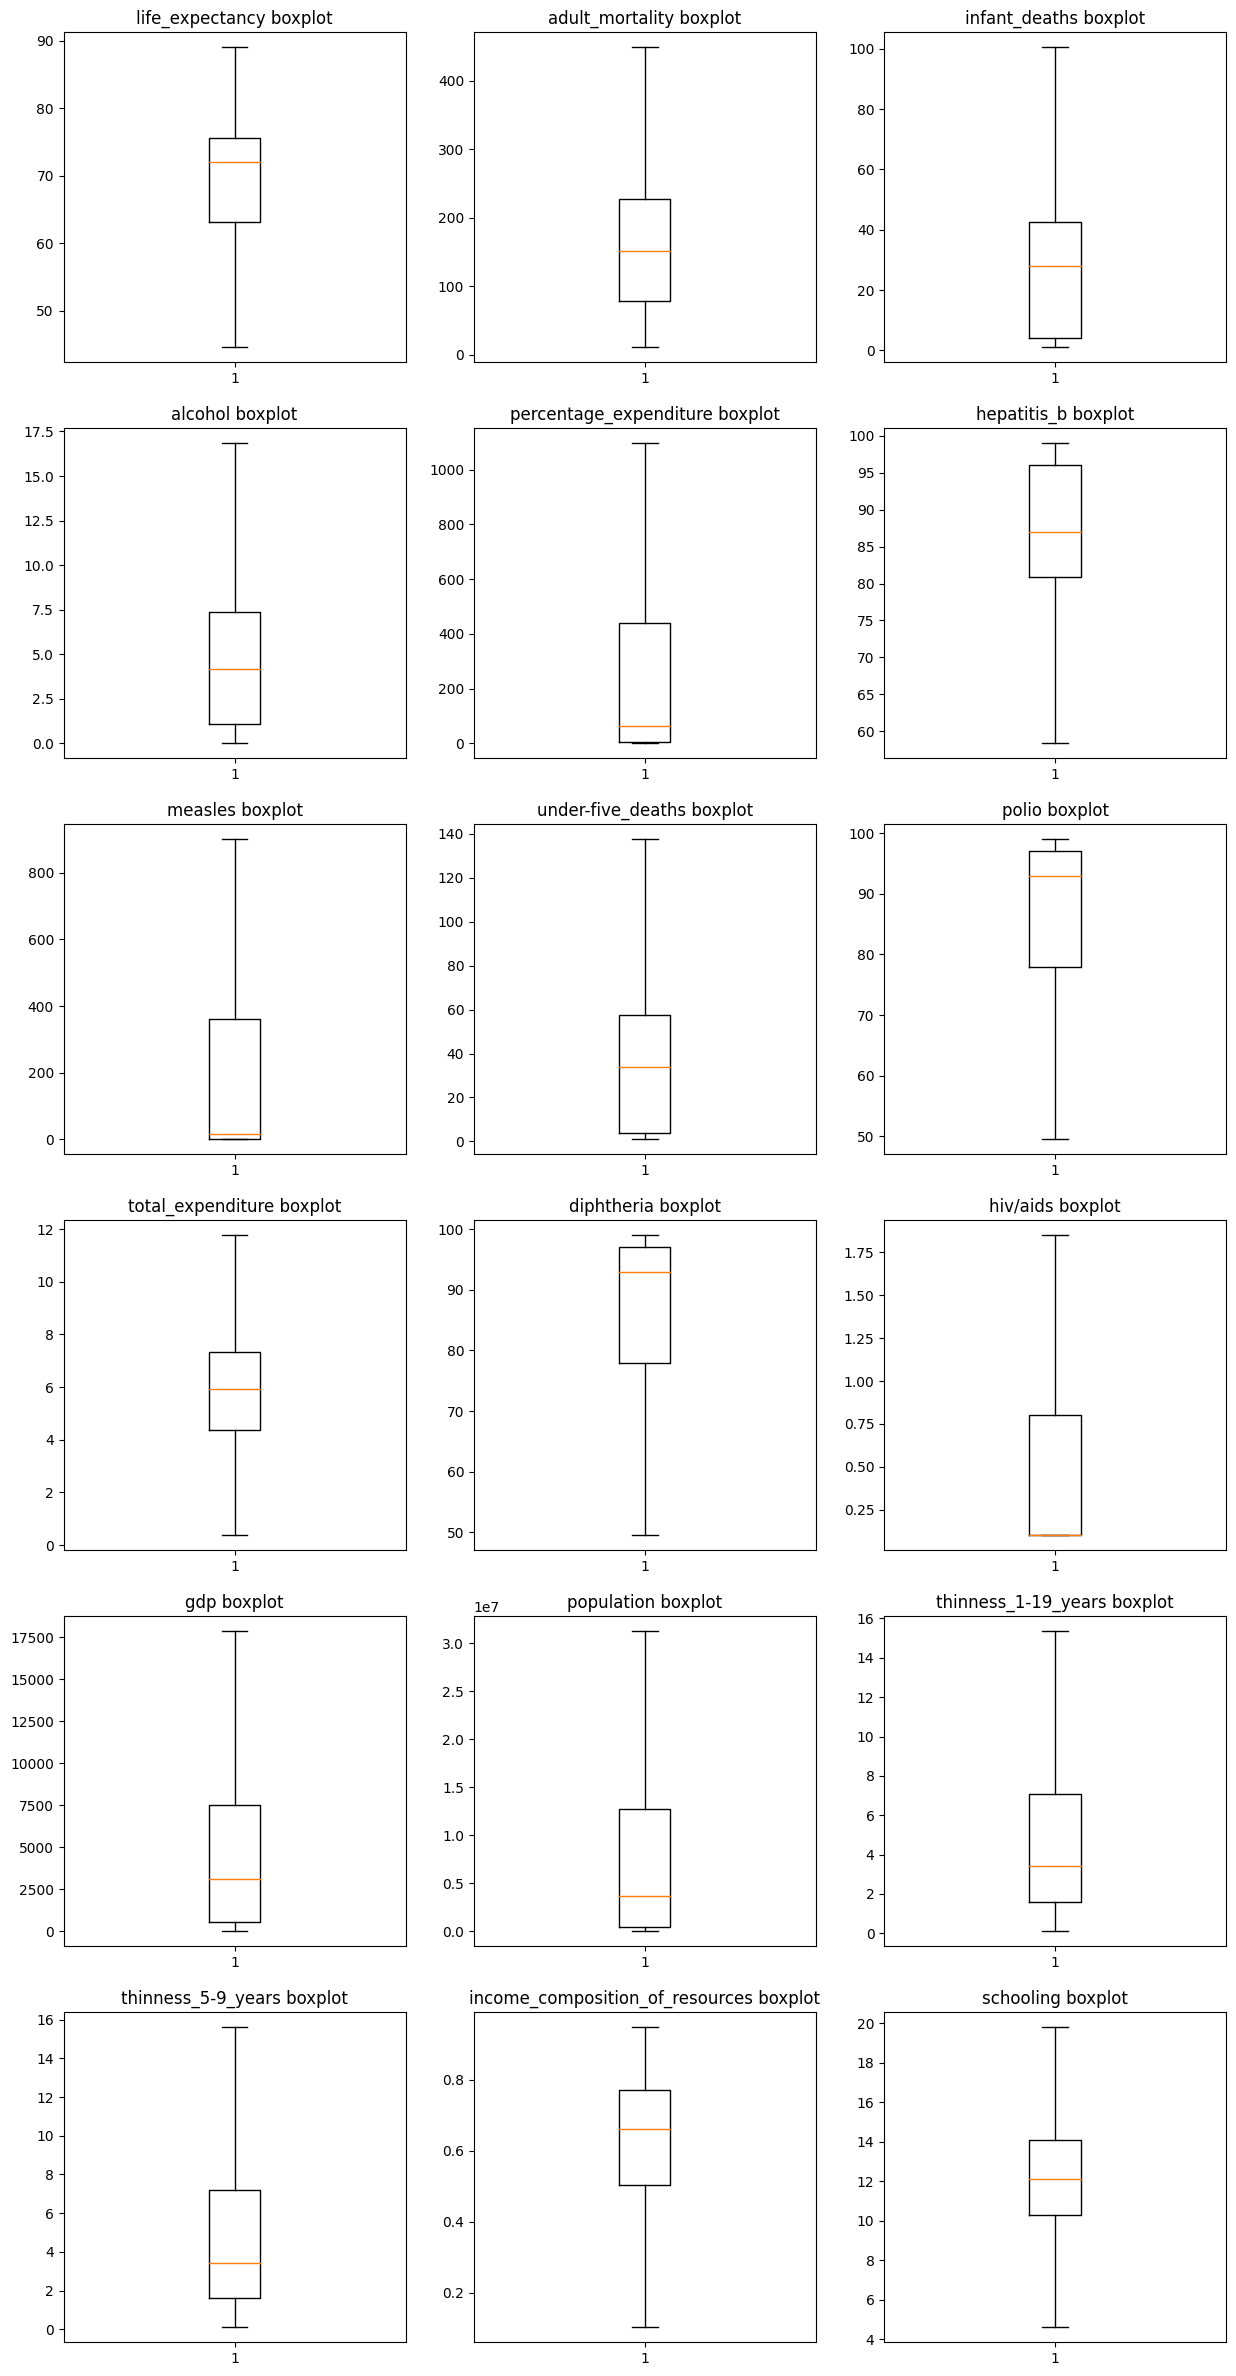

                                     year  life_expectancy  adult_mortality  \
year                             1.000000         0.169343        -0.066549   
life_expectancy                  0.169343         1.000000        -0.686022   
adult_mortality                 -0.066549        -0.686022         1.000000   
infant_deaths                   -0.021480        -0.215499         0.118233   
alcohol                         -0.048212         0.392769        -0.187475   
percentage_expenditure           0.032619         0.488264        -0.299344   
hepatitis_b                      0.141336         0.297688        -0.208828   
measles                         -0.121195        -0.336470         0.218410   
under-five_deaths               -0.038581        -0.290762         0.166611   
polio                            0.115490         0.567447        -0.350369   
total_expenditure                0.080874         0.214168        -0.120505   
diphtheria                       0.147625         0.

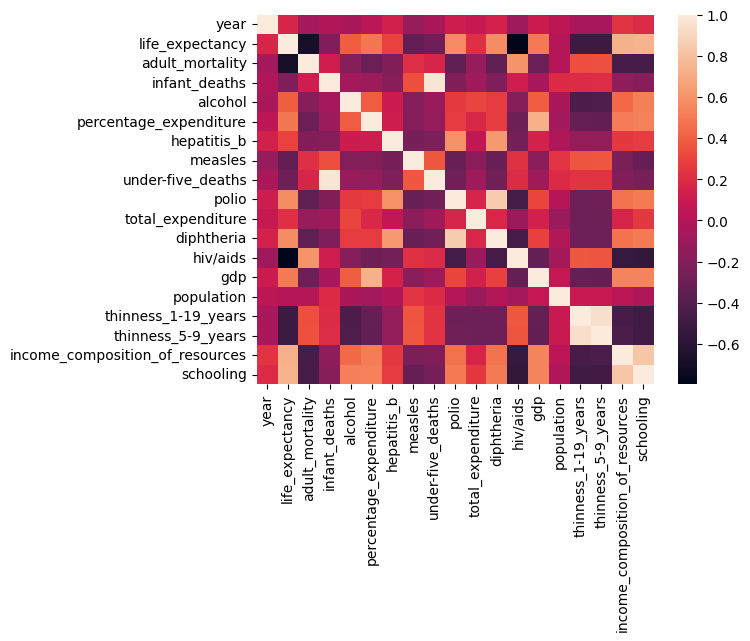

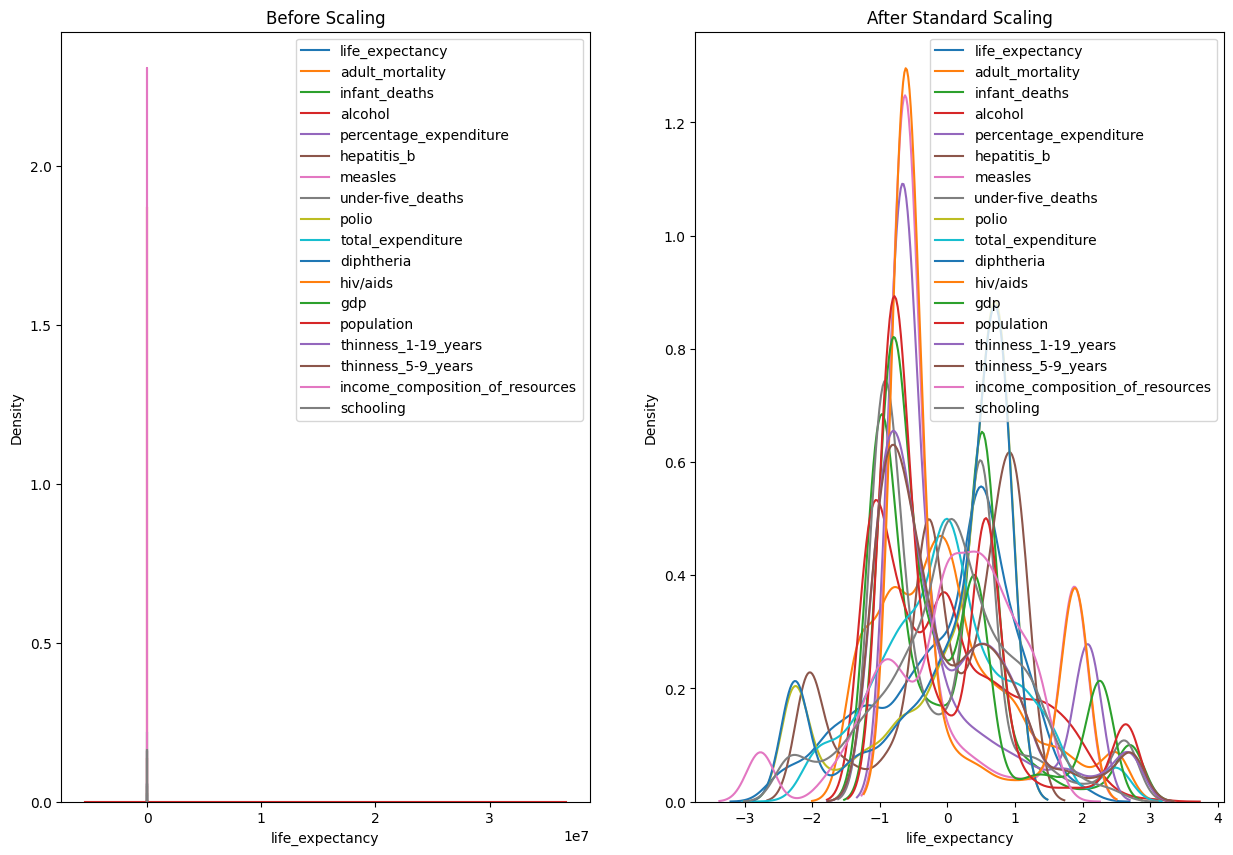

          country  year      status  life_expectancy  adult_mortality  \
0     Afghanistan  2015  Developing        -0.446803         0.863287   
1     Afghanistan  2014  Developing        -0.984892         0.934943   
2     Afghanistan  2013  Developing        -0.984892         0.908072   
3     Afghanistan  2012  Developing        -1.027095         0.943900   
4     Afghanistan  2011  Developing        -1.058747         0.970771   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing        -2.599157         2.529292   
2934     Zimbabwe  2003  Developing        -2.599157         2.529292   
2935     Zimbabwe  2002  Developing        -2.578055        -0.838545   
2936     Zimbabwe  2001  Developing        -2.525301         2.529292   
2937     Zimbabwe  2000  Developing        -2.451446         2.529292   

      infant_deaths   alcohol  percentage_expenditure  hepatitis_b   measles  \
0          1.253036 -1.173361              

In [21]:
# Function for scaling
def scale_data(df, scaler, scaler_name):
    # List of columns to scale
    # 'bmi' 제외. 다시 살려야 함
    columns_to_scale = ['life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years', 'thinness_5-9_years', 'income_composition_of_resources', 'schooling']

    # Copy the original dataframe
    df_scaled = df.copy()

    # Apply scaler to the columns
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    # Plotting
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 10))

    ax1.set_title('Before Scaling')
    for column in columns_to_scale:
        sns.kdeplot(df[column], ax=ax1, label = column)
    ax1.legend() # show the legend in the plot

    ax2.set_title('After ' + scaler_name)
    for column in columns_to_scale:
        sns.kdeplot(df_scaled[column], ax=ax2, label = column)
    ax2.legend()    # show the legend in the plot
    
    plt.show()

    return df_scaled

# Function to handle NaN values with mean values of the data by using fillna
# We can see that there are no NaN values in categorical columns, so for the numerical ones we would fill them with the mean values
def handle_null_values_fillna(df):
    # Checking for NaN Values
    print("===================== Null Value Count Before Handling =====================")
    print(df.isnull().sum())

    # Fill NaN values with mean, median or mode
    df.fillna(df.mean(), inplace=True)

    # Checking for NaN Values after handling
    print("\n===================== Null Value Count After Handling =====================")
    print(df.isnull().sum())

    
# Function to handle NaN values with mean values of the data by using SimpleImputer
def handle_null_values_simpleinputer(df):
    # Checking for NaN Values
    print("===================== Null Value Count Before Handling =====================")
    print(df.isnull().sum())

    from sklearn.impute import SimpleImputer
    imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
    df['Life expectancy ']=imputer.fit_transform(df[['Life expectancy ']])
    df['Adult Mortality']=imputer.fit_transform(df[['Adult Mortality']])
    df['Alcohol']=imputer.fit_transform(df[['Alcohol']])
    df['Hepatitis B']=imputer.fit_transform(df[['Hepatitis B']])
    df[' BMI ']=imputer.fit_transform(df[[' BMI ']])
    df['Polio']=imputer.fit_transform(df[['Polio']])
    df['Total expenditure']=imputer.fit_transform(df[['Total expenditure']])
    df['Diphtheria ']=imputer.fit_transform(df[['Diphtheria ']])
    df['GDP']=imputer.fit_transform(df[['GDP']])
    df['Population']=imputer.fit_transform(df[['Population']])
    df[' thinness  1-19 years']=imputer.fit_transform(df[[' thinness  1-19 years']])
    df[' thinness 5-9 years']=imputer.fit_transform(df[[' thinness 5-9 years']])
    df['Income composition of resources']=imputer.fit_transform(df[['Income composition of resources']])
    df['Schooling']=imputer.fit_transform(df[['Schooling']])

    # Checking for Null Values after handling
    print("\n===================== Null Value Count After Handling =====================")
    print(df.isnull().sum())


def handle_outliers(df):
    # Adult Mortality
    mort_3_percentile = np.percentile(df.adult_mortality.dropna(), 3)   # 하위 10 %
    df.loc[df.adult_mortality < mort_3_percentile, "adult_mortality"] = np.nan     # Change Nan

    # Infant Deaths
    df.infant_deaths.replace(0, np.nan, inplace=True)

    # Body Mass Index (BMI)
    df.loc[(df.bmi < 10) | (df.bmi > 50), "bmi"] = np.nan

    # Under-Five Deaths
    df['under-five_deaths'].replace(0, np.nan, inplace=True)

    return df

def compare_missing_values(df):
    before_outliers = df.isnull().sum()
    df = handle_outliers(df)
    after_outliers = df.isnull().sum()
    
    comparison = pd.DataFrame({'before': before_outliers, 'after': after_outliers})
    comparison['difference'] = comparison['after'] - comparison['before']
    
    return comparison

def outliers_visual(data,column_list):
    plt.figure(figsize=(15, 30))
    i = 0
    for col in column_list:
        i += 1
        plt.subplot(6, 3, i)      # 18
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        #i += 1
        # plt.subplot(9, 4, i)
        # plt.hist(data[col])
        # plt.title('{} histogram'.format(col))
    plt.show()

def outlier_count(col, data=df):  # IQR  
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))


def handle_outliers_iqr(df, column): # IQR  
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Defining the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifying the outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Replacing the outliers with the lower and upper bounds
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Apply different scalers
scale_data(df, StandardScaler(), 'Standard Scaling')
scale_data(df, MinMaxScaler(), 'MinMax Scaling')
scale_data(df, RobustScaler(), 'Robust Scaling')

print(df_scaled)
    
#plt.show()

print(compare_missing_values(df))
# Due to the high percentage of missing values in the BMI variable, removing it BMI columns.
df.drop(columns='bmi', inplace=True)

# Display dataset information
display_dataset_info(df)

# Replace the NaN Values with mean(or median) values of the data by using simpleInputer or fillna
handle_null_values_fillna(df)
#handle_null_values_simpleinputer(df)

# Step : Outliers detection
# Save df.columns
column_list = list(df.columns)[3:]

# Visualization outliers
outliers_visual(df,column_list)

# Printing percent of data that is outlier (before handling outliers)
print("Before handling outlier data")
print()
for col in column_list:
    outlier_count(col,df)

# Handle outlieres
for col in column_list:
    df = handle_outliers_iqr(df, col)

# Printing percent of data that is outlier (After handling outliers)
print("\n==================================================================================")
print("After handling outlier data")
print() 
for col in column_list:
    outlier_count(col,df)

# Outliers detection
outliers_visual(df,column_list)

corr_data=df.corr()
sns.heatmap(corr_data)
print(corr_data)

covariance = np.array(corr_data)
print(covariance[1])
life_expectancy_cov = covariance[1]
best_features = []

for i in range(19):
  if i == 1:
    continue
  if life_expectancy_cov[i] > 0.45:
    best_features.append(i)


print("best_features")
print(best_features)

feature_list = []

for i in best_features:
  print(i)
  df.columns[i]
  feature_list.append(df.columns[i])

print(feature_list)

df_scaled = scale_data(df, StandardScaler(), 'Standard Scaling')

print(df_scaled)

# Binning life_expectancy 1 - bmi과 관련있음
life_bins = [0,60,100] # Define life_expectancy bins as 0 to 60, 60 to 100
life_group_names = ['low 60','high 60']
life_categorise = pd.cut(df['life_expectancy'],life_bins,labels=life_group_names)

df['life_expectancy_categorise'] = life_categorise
print(df[['life_expectancy','life_expectancy_categorise']])

# Binning life_expectancy 2
life_bins2 = [0,10,20,30,40,50,60,70,80,90,100] # Define life_expectancy bins as 0 to 60, 60 to 100
life_group_names2 = ['0 to 10','10 to 20', '20 to 30','30 to 40','40 to 50','50 to 60', '60 to 70','70 to 80','80 to 90','90 to 100']
life_categorise2 = pd.cut(df['life_expectancy'],life_bins2,labels=life_group_names2)

df['life_expectancy_categorise2'] = life_categorise2
print(df[['life_expectancy','life_expectancy_categorise2']])

df.head()

'''
# Binning alcohol
alcohol_bins = [0,8.8,17]
alcohol_group_names = ['low','high']
alcohol_categorise = pd.cut(df['alcohol'],alcohol_bins,labels=alcohol_group_names)

df['alcohol_categorise'] = alcohol_categorise
print(df[['alcohol','alcohol_categorise']])

# Binning adult_mortality
adult_mortality_categorise = pd.cut(df['adult_mortality'], bins = (0,100,200,300,400,500), labels = ['low 100', '100 to 200', '200 to 300', '300 to 400', '400 to 500'])

df['adult_mortality_categorise'] = adult_mortality_categorise
print(df[['adult_mortality','adult_mortality_categorise']])

# Binning schooling - alcohol column과 연관성이 있음
schooling_categorise = pd.cut(df['schooling'], bins = (0,5,10,15,20),
                              labels = ['g1', 'g2', 'g3', 'g4'])

df['schooling_categorise'] = schooling_categorise
print(df[['schooling','schooling_categorise']])

df.head()
'''

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df.country)
df['country'] = encoder.transform(df.country)
encoder_1 = LabelEncoder()
encoder_1.fit(df.status)
df['status'] = encoder_1.transform(df.status)

# Decision Tree Classification

In the previous process, decision tree classification is performed for classes that divide target data into 0-60/60-100 and classes that divide life expectancy into 10 units.

For each data
1. Create decision tree without any constraints
2. Use Gridsearchcv to apply optimal parameters to reduce overfitting.

For each tree
Tree Visualization
Accuracy calculation for train/test data (individual accuracy output when cross-validation is performed)

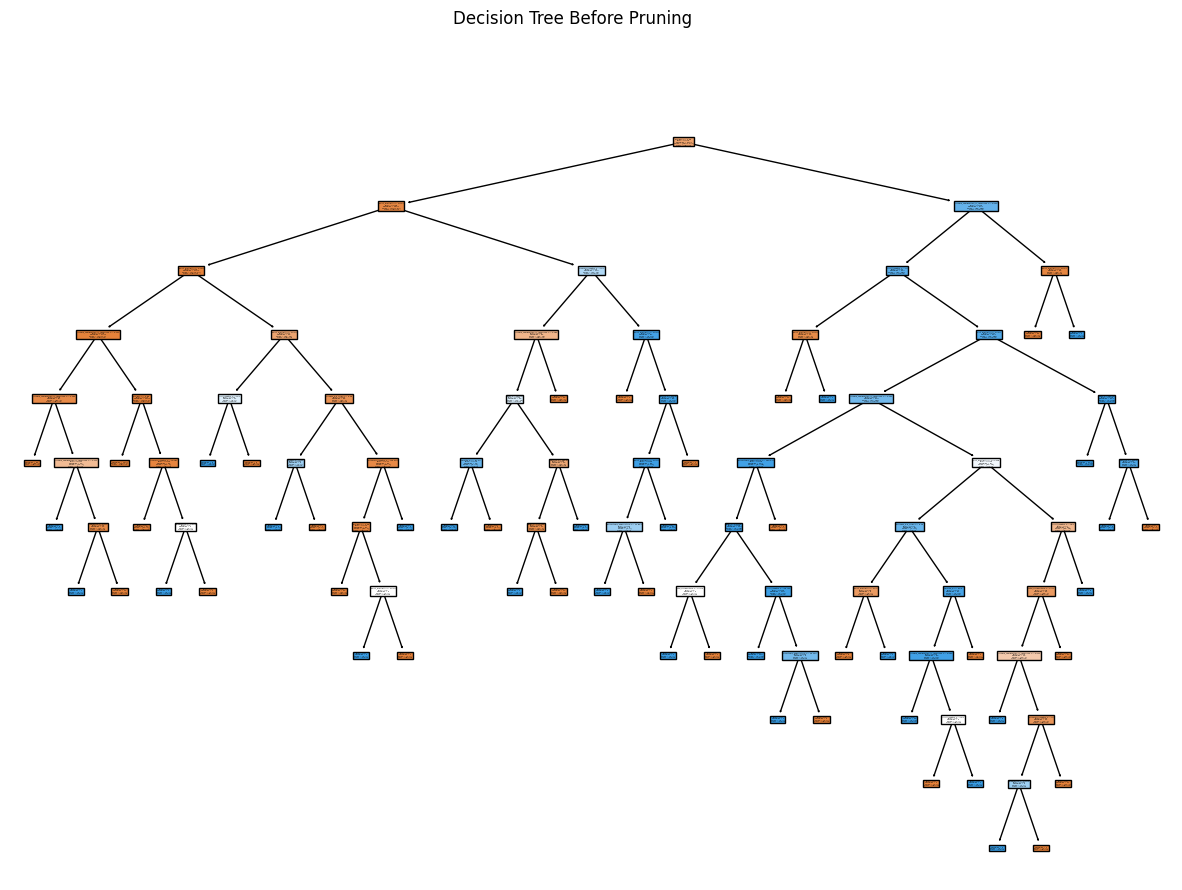

Before Pruning
Train data accuracy:  1.0
Test data accuracy:  0.9795918367346939
Best parameters
{'max_depth': 7, 'min_impurity_decrease': 0.0007000000000000001, 'min_samples_split': 2}


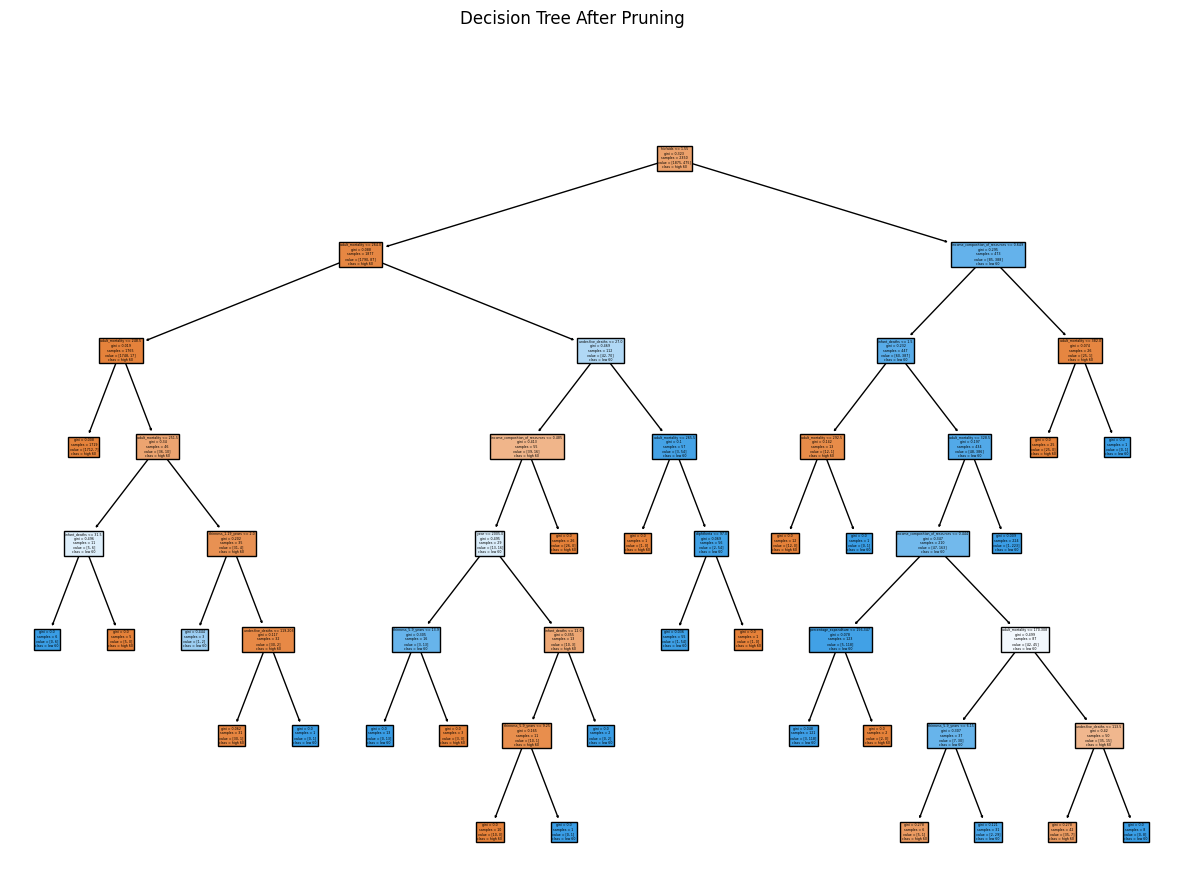

After Pruning
Train data:  0.9897872340425532
Test data:  0.9744897959183674


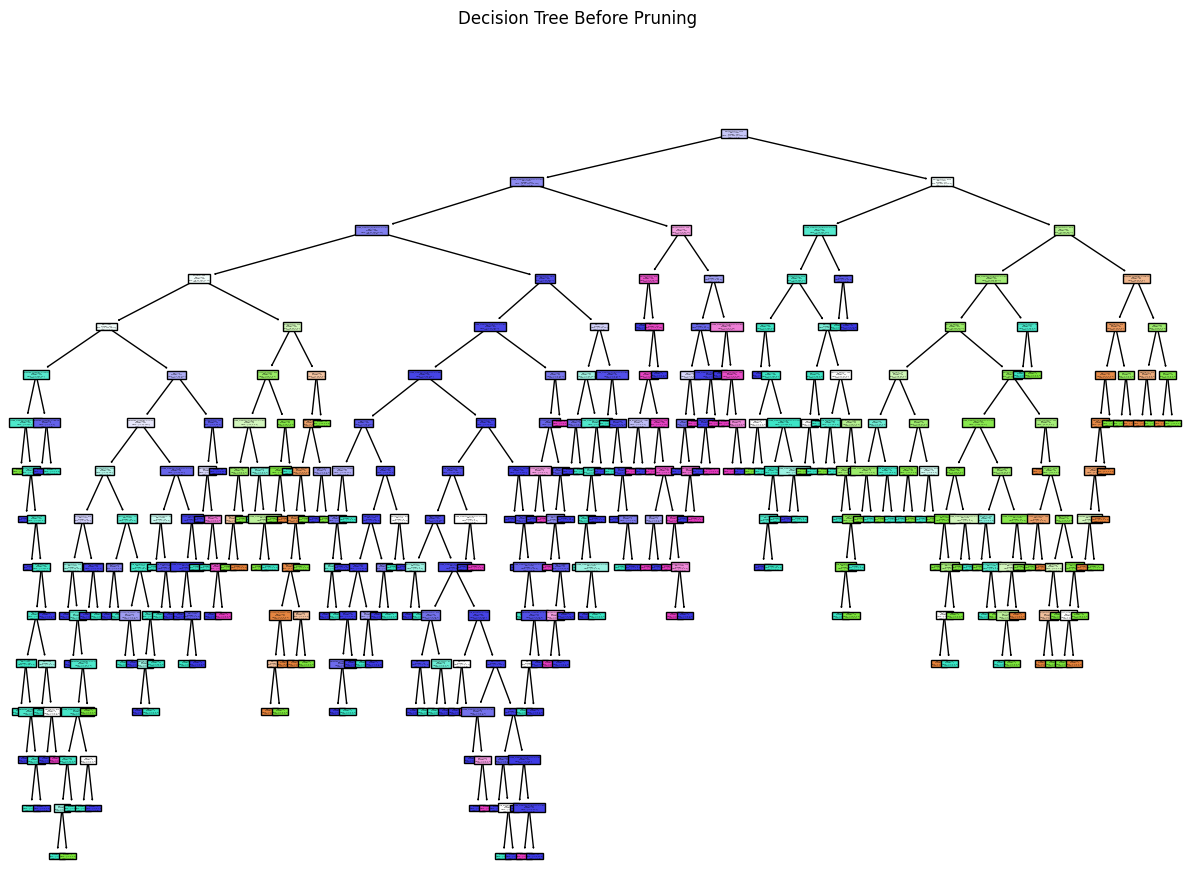

Before Pruning
Train data accuracy:  1.0
Test data accuracy:  0.8724489795918368
Best parameters
{'max_depth': 11, 'min_impurity_decrease': 0.0005, 'min_samples_split': 2}


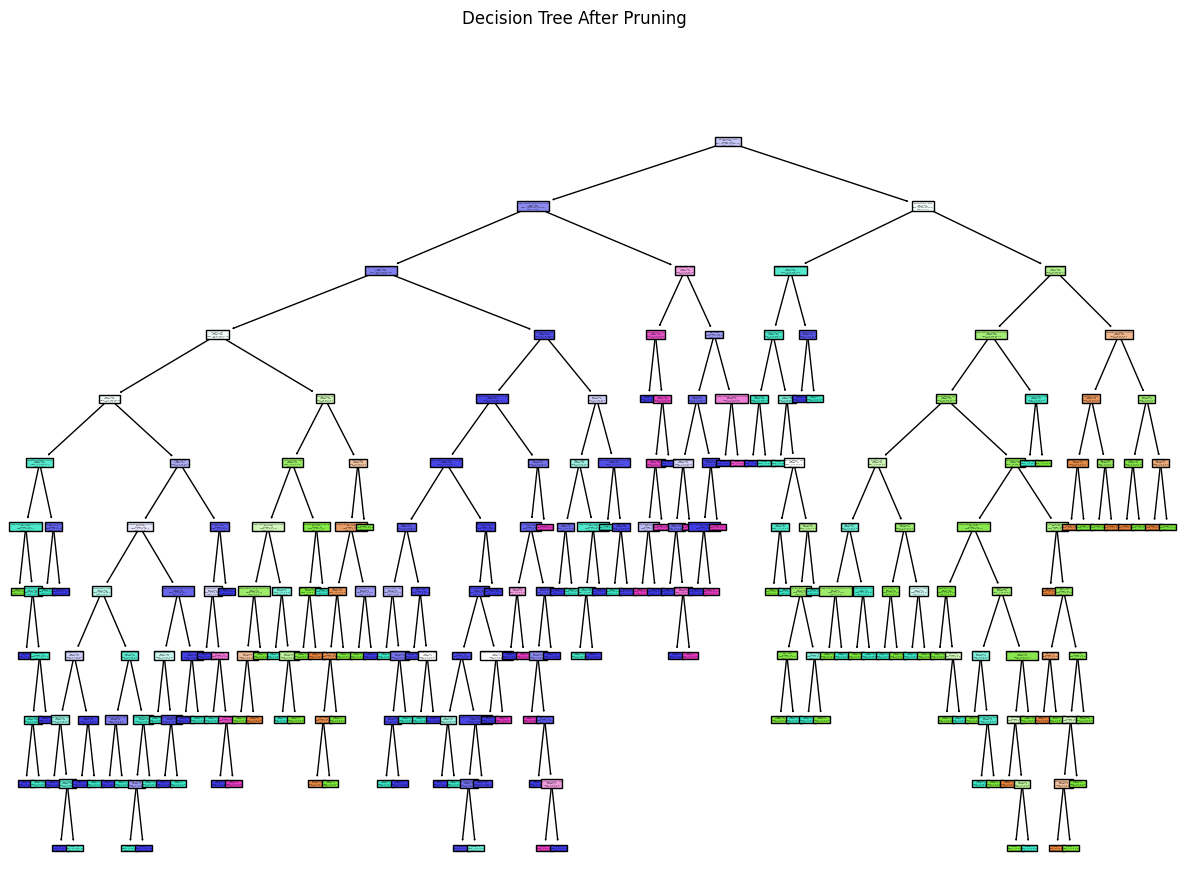

After Pruning
Train data:  0.98
Test data:  0.8843537414965986


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, KFold


params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

# Function to draw a tree
def drawTree(title, model, features):
  fig = plt.figure(figsize=(15, 10), facecolor='white')
  plt.suptitle(title)
  plot_tree(model,
            filled=True,
            feature_names=features.columns, 
            class_names=model.classes_, 
          )
  plt.show()

# Comparison of the shape and accuracy of the decision tree with the optimal hyperparameters with all features learned
def makeDecisionTree(features, target):
  # Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

  # Creating and training the decision tree classifier
  model = DecisionTreeClassifier()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # Evaluating the model
  drawTree("Decision Tree Before Pruning", model, features)

  print("Before Pruning")
  train_accuracy = model.score(X_train, y_train)
  print("Train data accuracy: ", train_accuracy)
  accuracy = model.score(X_test, y_test)
  print("Test data accuracy: ", accuracy)
  

  # Cross Validation using K-fold validation
  kf = KFold(n_splits=10, shuffle=True)

  # Gridsearchcv enables optimal hyperparameters such as pruning, min impurity
  gs = GridSearchCV(DecisionTreeClassifier(), params, cv=kf, n_jobs=-1)
  gs.fit(X_train, y_train)

  print("Best parameters")
  print(gs.best_params_)

  dt = gs.best_estimator_

  # Evaluating the model
  drawTree("Decision Tree After Pruning", dt, features)
  print("After Pruning")
  print("Train data: ", dt.score(X_train, y_train))
  print("Test data: ", dt.score(X_test, y_test))

# Decision tree classified by class with life expectancy 0-60 / 60-100
features = df.drop(['life_expectancy', 'life_expectancy_categorise', 'life_expectancy_categorise2'], axis=1)
target = df['life_expectancy_categorise']

makeDecisionTree(features, target)

# Life expectancy 0–10 / 10–20 / ... / Decision tree classified by class of 90-100
features = df.drop(['life_expectancy', 'life_expectancy_categorise', 'life_expectancy_categorise2'], axis=1)
target = df['life_expectancy_categorise2']

makeDecisionTree(features, target)


# Linear Regression

Linear regression with preprocessed data

Linear regression with scaled data

Determine by linear regression whether there is a linear relationship between each characteristic and life expectancy

Linear regression by screening data with linear relationships

Calculating linear regression using only good features

normal data
R-squared (Train): 0.8444079499947716
Mean Squared Error(Train): 14.129206762766614
R-squared (Test): 0.8573757558939417
Mean Squared Error (Test): 12.389070194602015


scaled data
R-squared (Train): 0.840893878489611
Mean Squared Error(Train): 0.16083626298130443
R-squared (Test): 0.8479636801907959
Mean Squared Error (Test): 0.14701424345589556


Column: adult_mortality
Mean Squared Error: 47.7977867680284
Accuracy: 0.44974698660575296

Column: infant_deaths
Mean Squared Error: 82.67138343238558
Accuracy: 0.048278572480484616

Column: alcohol
Mean Squared Error: 76.9007483153798
Accuracy: 0.11471071457403936

Column: percentage_expenditure
Mean Squared Error: 68.67535016390154
Accuracy: 0.20940233996632263

Column: hepatitis_b
Mean Squared Error: 77.34923571166736
Accuracy: 0.1095476817651303

Column: measles
Mean Squared Error: 74.81453777376144
Accuracy: 0.13872738385355066

Column: under-five_deaths
Mean Squared Error: 79.01077905121039
Accuracy: 0.09041982478075117

C

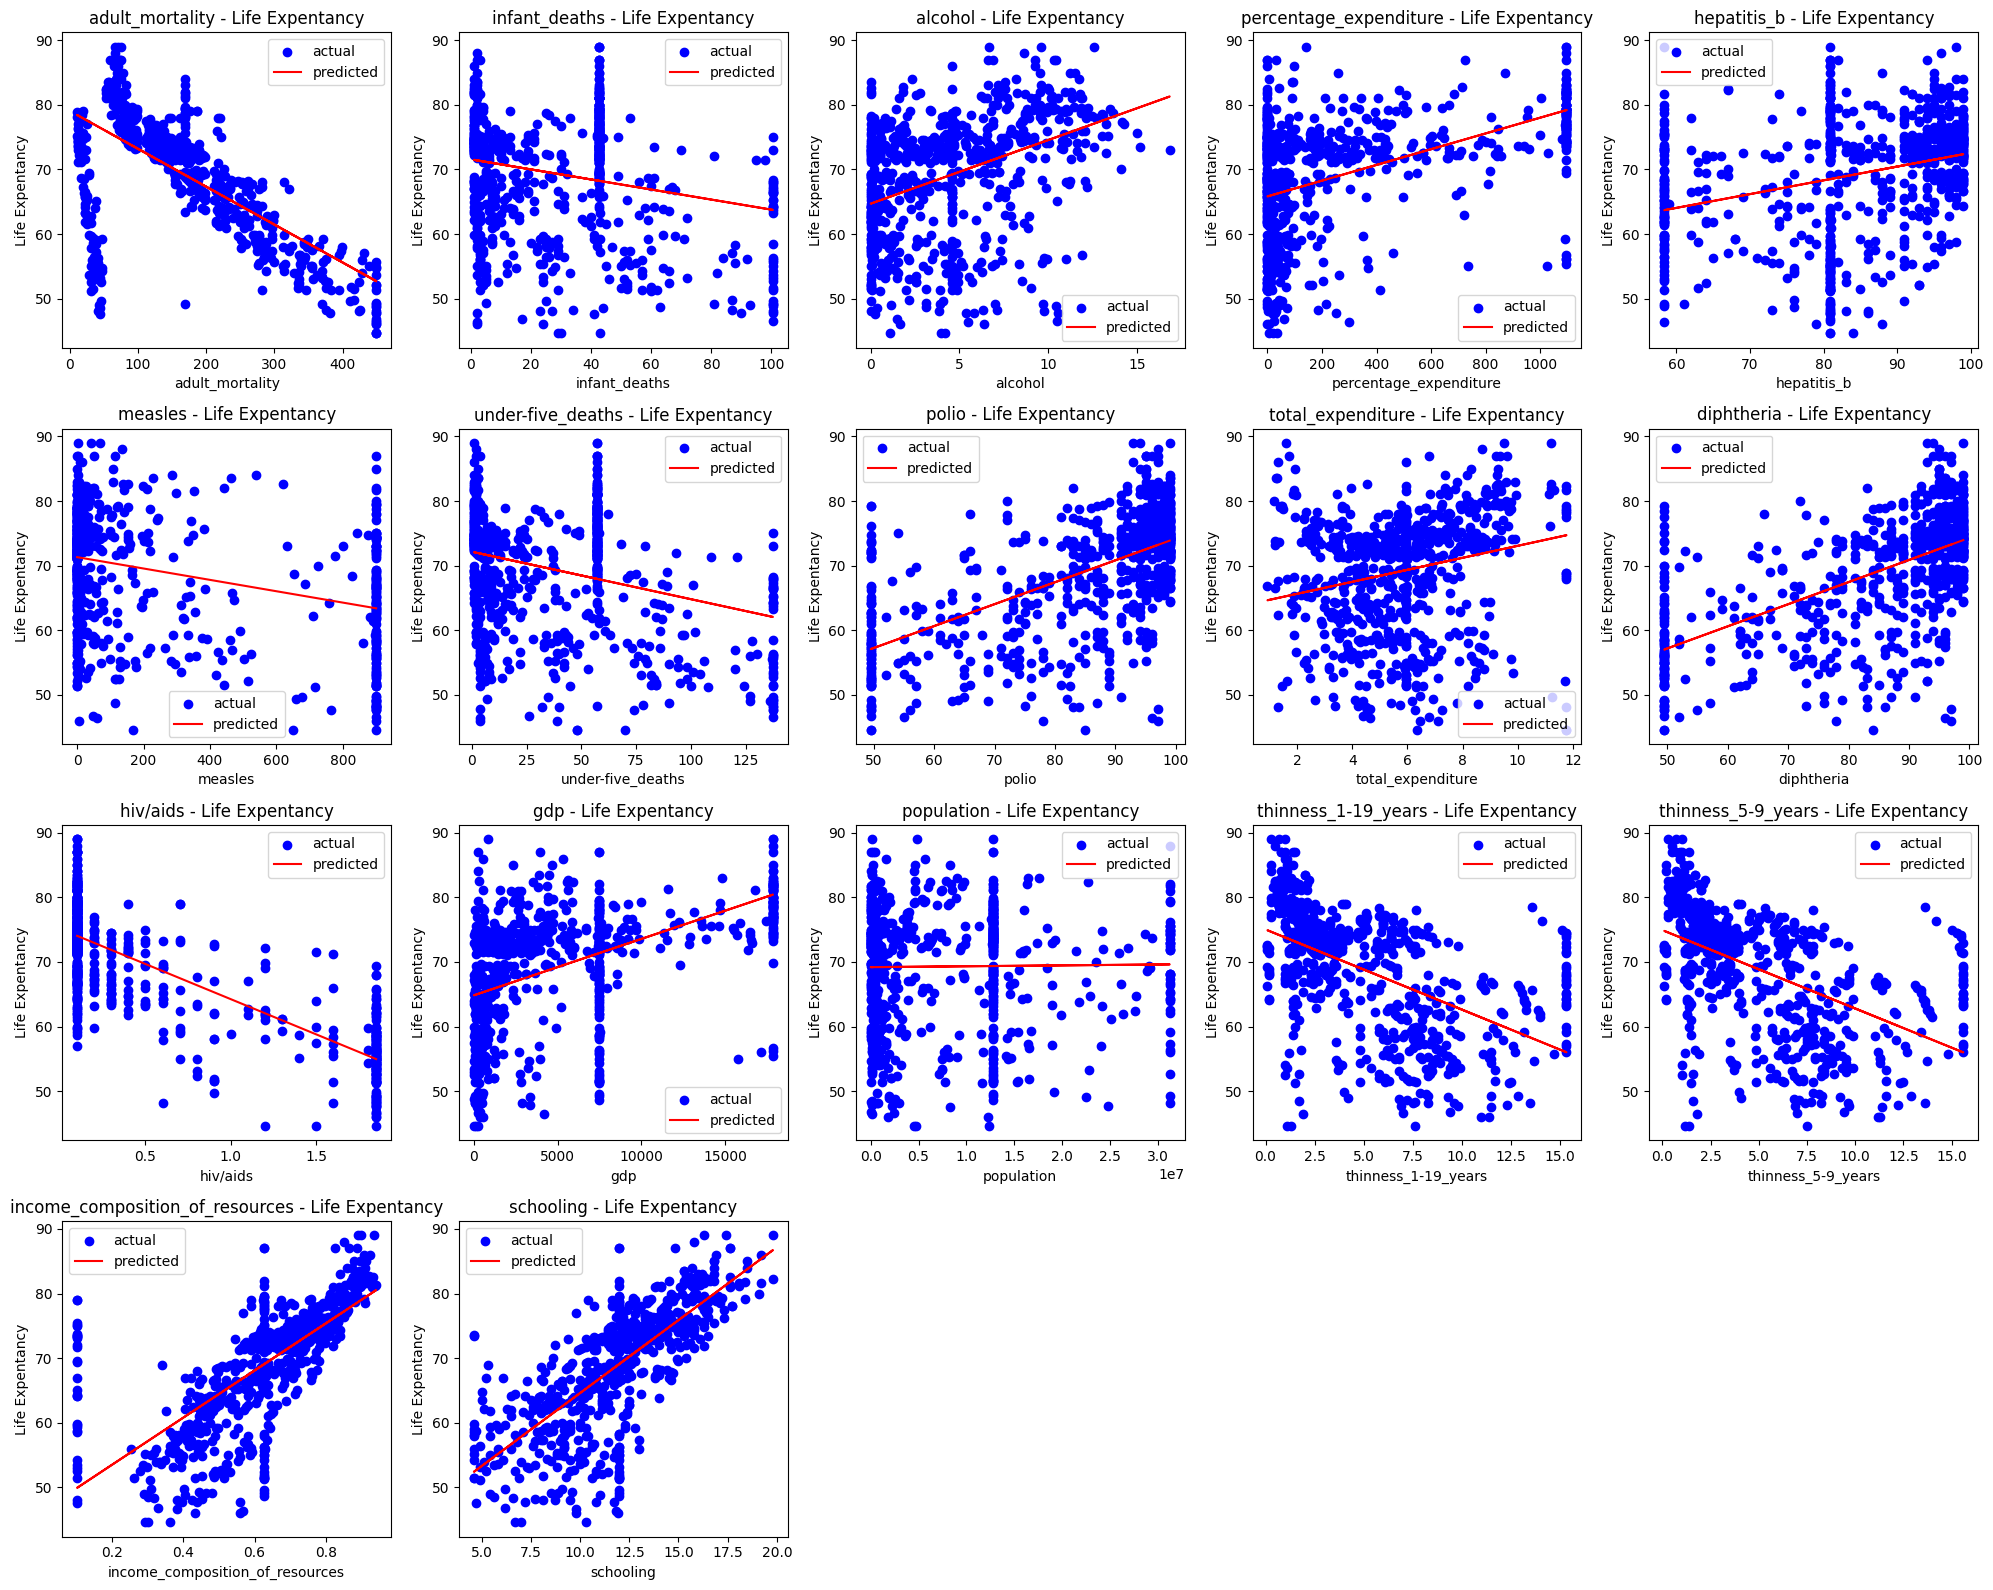



selected data
R-squared (Train): 0.8251591559468656
Mean Squared Error(Train): 15.69650461071231
R-squared (Test): 0.8315838184112126
Mean Squared Error (Test): 15.127763864956224


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

#Evaluation
# Calculating Mean squared error and r2 score
def countError(model, data_type, X_train, X_test, y_train, y_test):
  print(data_type)
  y_pred = model.predict(X_train)

  print("R-squared (Train):", model.score(X_train,y_train))

  mse = mean_squared_error(y_train, y_pred)
  print("Mean Squared Error(Train):", mse)

  y_pred_test = model.predict(X_test)

  r2_test = r2_score(y_test, y_pred_test)
  print("R-squared (Test):", r2_test)

  mse_test = mean_squared_error(y_test, y_pred_test)
  print("Mean Squared Error (Test):", mse_test)
 

y=df['life_expectancy']
X=df.drop(['life_expectancy', 'life_expectancy_categorise', 'life_expectancy_categorise2'], axis=1)

# Split the data into training data and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

Linear_model= LinearRegression()
Linear_model.fit(X_train,y_train)

countError(Linear_model, "normal data", X_train, X_test, y_train, y_test)

print("\n====================\n")

y=df_scaled['life_expectancy']
X=df_scaled.drop(['life_expectancy', 'country', 'year', 'status'], axis=1)

# Split the data into training data and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

Linear_model2= LinearRegression()
Linear_model2.fit(X_train,y_train)

countError(Linear_model2, "scaled data", X_train, X_test, y_train, y_test)

print("\n====================\n")

num_rows = 4
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 16))
columns = ['adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling']

# Build a linear regression model for each column and evaluate its accuracy.
for i, column in enumerate(columns):
    X = df[[column]]
    y = df['life_expectancy']

    # Split the data into training data and test data.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Visualize the predicted results of the test dataset.
    row = i // num_cols
    col = i % num_cols
    axes[row, col].scatter(X_test, y_test, color='b', label='actual')
    axes[row, col].plot(X_test, y_pred, color='r', label='predicted')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Life Expentancy')
    axes[row, col].set_title('{} - Life Expentancy'.format(column))
    axes[row, col].legend()

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    accuracy = model.score(X_test, y_test)
    print("Column:", column)
    print("Mean Squared Error:", mse)
    print("Accuracy:", accuracy)
    print("")


# Delete additional subplot spaces.
for i in range(len(columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

# Linear regression by linearly analyzing each data to select some characteristics.
df_s = df[['adult_mortality', 'hiv/aids', 'polio', 'diphtheria', 'gdp','income_composition_of_resources', 'schooling']]

y=df['life_expectancy']
X=df_s

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Linear_model3= LinearRegression()
Linear_model3.fit(X_train,y_train)

print("\n====================\n")
countError(Linear_model3, "selected data", X_train, X_test, y_train, y_test)

